<a href="https://colab.research.google.com/github/payares0510/metodos-computacionales-1/blob/main/Solucion_tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Ejercicios Axiomas de probabilidad
#punto 1

def P1(event):
    """Ejemplo de medida de probabilidad P1."""
    probabilities = {"A": 0.4, "B": 0.6, "C": 0.0}
    return probabilities.get(event, 0)

def P2(event):
    """Ejemplo de medida de probabilidad P2."""
    probabilities = {"A": 0.3, "B": 0.7, "C": 0.0}
    return probabilities.get(event, 0)
a1 = 0.5
a2 = 0.5
assert a1 + a2 == 1, "Los coeficientes no suman 1"

def P(event):
    return a1 * P1(event) + a2 * P2(event)

def verificar_axiomas():
    eventos = ["A", "B", "C"]
    for evento in eventos:
        if P(evento) < 0:
            print(f"Axioma 1 fallido para el evento {evento}")
            return False

    espacio_muestral = ["A", "B"]
    prob_total = sum(P(evento) for evento in espacio_muestral)
    if abs(prob_total - 1) > 1e-6:
        print("Axioma 2 fallido: La probabilidad total no es 1")
        return False

    eventos_disjuntos = [["A"], ["B"]]
    union_prob = P("A") + P("B")
    if abs(union_prob - sum(P(evento) for evento in espacio_muestral)) > 1e-6:
        print("Axioma 3 fallido: La aditividad no se cumple")
        return False

    print("Todos los axiomas se cumplen.")
    return True
verificar_axiomas()

Todos los axiomas se cumplen.


True

In [ ]:

#punto 2

def P(A):
    """Definición de la medida de probabilidad P."""
    if A == frozenset():
        return 0
    elif A == frozenset({1}):
        return 1/3
    elif A == frozenset({2}):
        return 2/3
    elif A == frozenset({1, 2}):
        return 1
    else:
        raise ValueError("El conjunto no pertenece a la σ-álgebra definida.")

def verificar_axiomas():
    eventos = [frozenset(), frozenset({1}), frozenset({2}), frozenset({1, 2})]
    for evento in eventos:
        if P(evento) < 0:
            print(f"Axioma 1 fallido para el evento {evento}")
            return False
    espacio_muestral = frozenset({1, 2})
    if P(espacio_muestral) != 1:
        print("Axioma 2 fallido: La probabilidad del espacio muestral no es 1")
        return False
    evento1 = frozenset({1})
    evento2 = frozenset({2})
    union = frozenset({1, 2})
    if P(union) != P(evento1) + P(evento2):
        print("Axioma 3 fallido: La aditividad no se cumple")
        return False

    print("Todos los axiomas se cumplen. P es una medida de probabilidad.")
    return True
verificar_axiomas()

Todos los axiomas se cumplen. P es una medida de probabilidad.


True

In [ ]:
#punto 3
def iguales_con_tolerancia(a, b, tol=1e-9):
    """Devuelve True si a y b son iguales dentro de una tolerancia."""
    return abs(a - b) < tol

def union(A, B):
    """Devuelve la unión de A y B."""
    return A | B

def interseccion(A, B):
    """Devuelve la intersección de A y B."""
    return A & B

def diferencia(A, B):
    """Devuelve la diferencia A - B."""
    return A - B

def verificar_propiedades():
    # a)
    assert P(frozenset()) == 0, "Propiedad a) fallida"

    # b)
    for A in [frozenset(), frozenset({1}), frozenset({2}), frozenset({1, 2})]:
        complemento_A = complemento(A, universo)
        print(f"Evento: {A}, Complemento: {complemento_A}, P(A): {P(A)}, P(A^c): {P(complemento_A)}")
        assert iguales_con_tolerancia(P(complemento_A), 1 - P(A)), f"Propiedad b) fallida para A = {A}"

    # c)
    A = frozenset({1})
    B = frozenset({1, 2})
    assert iguales_con_tolerancia(P(B), P(A) + P(diferencia(B, A))), "Propiedad c) fallida"

    # d)
    for A in [frozenset(), frozenset({1}), frozenset({2}), frozenset({1, 2})]:
        assert P(A) <= 1, f"Propiedad d) fallida para A = {A}"

    # e)
    A = frozenset({1})
    B = frozenset({1, 2})
    assert P(A) <= P(B), "Propiedad e) fallida"

    # f)
    A = frozenset({1})
    B = frozenset({2})
    union_AB = union(A, B)
    inter_AB = interseccion(A, B)
    print(f"Propiedad f) -> P(A): {P(A)}, P(B): {P(B)}, P(A ∪ B): {P(union_AB)}, P(A ∩ B): {P(inter_AB)}")
    assert iguales_con_tolerancia(P(union_AB), P(A) + P(B) - P(inter_AB)), "Propiedad f) fallida"

    # g)
    C = frozenset({2})
    union_ABC = union(union(A, B), C)
    inter_AB = interseccion(A, B)
    inter_AC = interseccion(A, C)
    inter_BC = interseccion(B, C)
    inter_ABC = interseccion(inter_AB, C)
    print(f"Propiedad g) -> P(A ∪ B ∪ C): {P(union_ABC)}")
    assert iguales_con_tolerancia(
        P(union_ABC),
        P(A) + P(B) + P(C) - P(inter_AB) - P(inter_AC) - P(inter_BC) + P(inter_ABC),
        "Propiedad g) fallida")

    # h)
    print(f"Propiedad h) -> P(A - B): {P(diferencia(A, B))}, P(A): {P(A)}, P(A ∩ B): {P(inter_AB)}")
    assert iguales_con_tolerancia(P(diferencia(A, B)), P(A) - P(inter_AB)), "Propiedad h) fallida"

    # i)
    dif_sim = union(diferencia(A, B), diferencia(B, A))
    print(f"Propiedad i) -> P(A Δ B): {P(dif_sim)}, P(A): {P(A)}, P(B): {P(B)}, P(A ∩ B): {P(inter_AB)}")
    assert iguales_con_tolerancia(P(dif_sim), P(A) + P(B) - 2 * P(inter_AB)), "Propiedad i) fallida"

    print("Todas las propiedades se verificaron correctamente.")
verificar_propiedades()




Evento: frozenset(), Complemento: frozenset({1, 2}), P(A): 0.0, P(A^c): 1.0
Evento: frozenset({1}), Complemento: frozenset({2}), P(A): 0.3333333333333333, P(A^c): 0.6666666666666666
Evento: frozenset({2}), Complemento: frozenset({1}), P(A): 0.6666666666666666, P(A^c): 0.3333333333333333
Evento: frozenset({1, 2}), Complemento: frozenset(), P(A): 1.0, P(A^c): 0.0
Propiedad f) -> P(A): 0.3333333333333333, P(B): 0.6666666666666666, P(A ∪ B): 1.0, P(A ∩ B): 0.0
Propiedad g) -> P(A ∪ B ∪ C): 1.0


TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
#Ejercicios Probabilidad condicional y total
#Punto 1

total_participantes = 1000
hombres = 600
mujeres = 400
usa_gafas = 300
no_usa_gafas = 700
hombres_gafas = 185
mujeres_gafas = 115
P_H = hombres / total_participantes  # a)
P_M = mujeres / total_participantes  # b)
P_G = usa_gafas / total_participantes  # c)
P_G_M = mujeres_gafas / total_participantes
P_M_cond = mujeres / total_participantes
P_G_given_M = P_G_M / P_M  # d)

print(f"a) P(H) = {P_H} = {3/5}")
print(f"b) P(M) = {P_M} = {2/5}")
print(f"c) P(G) = {P_G} = {3/10}")
print(f"d) P(G|M) = {P_G_given_M} = {23/80}")


a) P(H) = 0.6 = 0.6
b) P(M) = 0.4 = 0.4
c) P(G) = 0.3 = 0.3
d) P(G|M) = 0.2875 = 0.2875


In [ ]:
# Punto 2
P1 = 1/3
P2 = 2/3
P_R_1 = 3/10
P_N_1 = 1/10
P_R_2 = 6/10
P_N_2 = 2/10

# a)
P_R = (P_R_1 * P1) + (P_R_2 * P2)
print(f"a) P(R) = {P_R}")

# b)
P_N = (P_N_1 * P1) + (P_N_2 * P2)
print(f"b) P(N) = {P_N}")

# c)
P_1_given_N = (P_N_1 * P1) / P_N
print(f"c) P(1|N) = {P_1_given_N}")

# d)
P_2_given_N = (P_N_2 * P2) / P_N
print(f"d) P(2|N) = {P_2_given_N}")


a) P(R) = 0.49999999999999994
b) P(N) = 0.16666666666666666
c) P(1|N) = 0.2
d) P(2|N) = 0.8


In [ ]:
#Punto 3

total_dulces = 5
dulces_fresa = 3
dulces_limon = 2
P_F1 = dulces_fresa / total_dulces
P_F2_given_F1 = (dulces_fresa - 1) / (total_dulces - 1)
P_F1_and_F2 = P_F1 * P_F2_given_F1

print(f"P(F ∩ F) = {P_F1_and_F2}")


P(F ∩ F) = 0.3


In [60]:

#TEOREMA DE BAYES#

#punto 1#

P_F = 0.4
P_Fc = 0.6
P_H_given_F = 0.75
P_M_given_F = 0.25
P_M_given_Fc = 0.6
P_H_given_Fc = 0.4

# a)
P_M = (P_M_given_F * P_F) + (P_M_given_Fc * P_Fc)
print(f"a) P(M) = {P_M} = {23/50}")

# b)
P_F_and_H = P_H_given_F * P_F
print(f"b) P(F ∩ H) = {P_F_and_H} = {3/10}")

# c)
P_F_and_M = P_M_given_F * P_F
P_F_given_M = P_F_and_M / P_M
print(f"c) P(F|M) = {P_F_given_M} = {5/23}")


a) P(M) = 0.45999999999999996 = 0.46
b) P(F ∩ H) = 0.30000000000000004 = 0.3
c) P(F|M) = 0.2173913043478261 = 0.21739130434782608


In [ ]:

#punto 2#

import numpy as np

lambdas = np.array([1, 2, 3, 4])
prioris = np.array([0.4, 0.3, 0.2, 0.1])
x = 4
factorial_x = np.math.factorial(x)

# a)
lambda_estimado_inicial = np.sum(lambdas * prioris)
print(f"a) Estimación inicial de lambda: {lambda_estimado_inicial}")

# b)
verosimilitudes = (lambdas**x * np.exp(-lambdas)) / factorial_x
print(f"b) Verosimilitudes: {verosimilitudes}")

# c)
posterior_no_normalizada = verosimilitudes * prioris
posterior_normalizada = posterior_no_normalizada / np.sum(posterior_no_normalizada)
print(f"c) Distribución posterior: {posterior_normalizada}")

# d)
suma_posterior = np.sum(posterior_normalizada)
print(f"d) Suma de la distribución posterior: {suma_posterior} (debe ser 1)")

# e)
indice_max_posterior = np.argmax(posterior_normalizada)
lambda_mas_probable = lambdas[indice_max_posterior]
print(f"e) Modelo más probable: λ = {lambda_mas_probable}")

# f)
lambda_estimado_posterior = np.sum(lambdas * posterior_normalizada)
print(f"f) Mejor parámetro λ estimado: {lambda_estimado_posterior}")


a) Estimación inicial de lambda: 2.0
b) Verosimilitudes: [0.01532831 0.09022352 0.16803136 0.19536681]
c) Distribución posterior: [0.07101262 0.31348898 0.38922576 0.22627264]
d) Suma de la distribución posterior: 1.0 (debe ser 1)
e) Modelo más probable: λ = 3
f) Mejor parámetro λ estimado: 2.7707584253176796


<ipython-input-22-610cd9ea944c>:7: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  factorial_x = np.math.factorial(x)  # x! = 4!


In [ ]:

#punto 3#

import numpy as np
import math

lambdas = np.array([1, 2, 3, 4])
prioris = np.array([0.4, 0.3, 0.2, 0.1])
x1, x2 = 4, 5
factorial_x1 = math.factorial(x1)
factorial_x2 = math.factorial(x2)

# a)
lambda_estimado_inicial = np.sum(lambdas * prioris)
print(f"a) Estimación inicial de lambda: {lambda_estimado_inicial}")

# b)
verosimilitudes = (lambdas**(x1 + x2) * np.exp(-2 * lambdas)) / (factorial_x1 * factorial_x2)
print(f"b) Verosimilitudes conjuntas: {verosimilitudes}")

# c)
posterior_no_normalizada = verosimilitudes * prioris
posterior_normalizada = posterior_no_normalizada / np.sum(posterior_no_normalizada)
print(f"c) Distribución posterior: {posterior_normalizada}")

# d)
suma_posterior = np.sum(posterior_normalizada)
print(f"d) Suma de la distribución posterior: {suma_posterior} (debe ser 1)")

# e)
indice_max_posterior = np.argmax(posterior_normalizada)
lambda_mas_probable = lambdas[indice_max_posterior]
print(f"e) Modelo más probable: λ = {lambda_mas_probable}")

# f)
lambda_estimado_posterior = np.sum(lambdas * posterior_normalizada)
print(f"f) Mejor parámetro λ estimado: {lambda_estimado_posterior}")


a) Estimación inicial de lambda: 2.0
b) Verosimilitudes conjuntas: [4.69914178e-05 3.25611358e-03 1.69407219e-02 3.05345539e-02]
c) Distribución posterior: [0.00252736 0.1313438  0.45556534 0.41056351]
d) Suma de la distribución posterior: 1.0 (debe ser 1)
e) Modelo más probable: λ = 3
f) Mejor parámetro λ estimado: 3.274164986959539


a) Probabilidades a priori: Π(e) = 0.5, Π(p) = 0.25, Π(α) = 0.25
b) Probabilidad de detección P(D): 0.65
c) Distribución posterior: P(e|D) = 0.6923, P(p|D) = 0.2308, P(α|D) = 0.0769
d) Respuesta al inciso d: P(e|D) = 0.6923, P(p|D) = 0.2308, P(α|D) = 0.0769


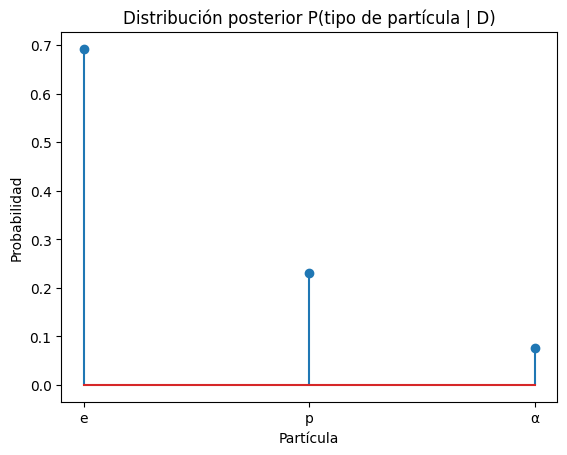

In [ ]:

#punto 4#

import matplotlib.pyplot as plt
import numpy as np

# a)
Pi = np.array([0.5, 0.25, 0.25])
print(f"a) Probabilidades a priori: Π(e) = {Pi[0]}, Π(p) = {Pi[1]}, Π(α) = {Pi[2]}")
P_D_given = np.array([0.9, 0.6, 0.2])

# b)
P_D = np.sum(P_D_given * Pi)
print(f"b) Probabilidad de detección P(D): {P_D}")

# c)
posterior = (P_D_given * Pi) / P_D
print(f"c) Distribución posterior: P(e|D) = {posterior[0]:.4f}, P(p|D) = {posterior[1]:.4f}, P(α|D) = {posterior[2]:.4f}")

# d)
print(f"d) Respuesta al inciso d: P(e|D) = {posterior[0]:.4f}, P(p|D) = {posterior[1]:.4f}, P(α|D) = {posterior[2]:.4f}")
particulas = ['e', 'p', 'α']
plt.stem(particulas, posterior)
plt.title("Distribución posterior P(tipo de partícula | D)")
plt.ylabel("Probabilidad")
plt.xlabel("Partícula")
plt.show()


In [ ]:
import math

# 1.
def variacion(n, k):
    return math.factorial(n) // math.factorial(n - k)

podio = variacion(3, 2)
print(f"1. Podio (Variación sin repetición): {podio}")

# 2.
def combinacion(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

ensalada = combinacion(3, 2)
print(f"2. Ensalada (Combinación sin repetición): {ensalada}")

# 3.
def permutacion(n):
    return math.factorial(n)

cola = permutacion(5)
print(f"3. Cola (Permutación sin repetición): {cola}")

# 4.
premios = variacion(8, 3)
print(f"4. Premios (Variación sin repetición): {premios}")

# 5.
marineros = combinacion(10, 2)
print(f"5. Marineros (Combinación sin repetición): {marineros}")

# 6.
libros = variacion(7, 5)
print(f"6. Libros (Variación sin repetición): {libros}")

# 7.
comite = combinacion(10, 2)
print(f"7. Comité (Combinación sin repetición): {comite}")

# 8.
def permutacion_con_repeticion(total, repeticiones):
    denominador = math.prod(math.factorial(r) for r in repeticiones)
    return math.factorial(total) // denominador

palabras = permutacion_con_repeticion(8, [3, 3])
print(f"8. Palabras (Permutación con repetición): {palabras}")

# 9.
equipos = combinacion(11, 5)
print(f"9. Equipos (Combinación sin repetición): {equipos}")


# 10.
jugos = sum(combinacion(4, r) for r in range(2, 5))
print(f"10. Jugos surtidos (Combinación sin repetición, al menos 2 frutas): {jugos}")

# 11.
seleccion_cargo = variacion(10, 3)
print(f"11. Selección de 3 estudiantes (Variación sin repetición): {seleccion_cargo}")

# 12.
premios_campeonato = variacion(8, 2)
print(f"12. Premios en campeonato (Variación sin repetición): {premios_campeonato}")

# 13.
numeros_distintos = variacion(7, 3)
print(f"13. Números de 3 cifras distintas (Variación sin repetición): {numeros_distintos}")

# 14.
numeros_con_repeticion = 7 ** 3
print(f"14. Números de 3 cifras con repetición: {numeros_con_repeticion}")

# 15.
comite_3 = combinacion(10, 3)
print(f"15. Comité de 3 estudiantes (Combinación sin repetición): {comite_3}")

# 16.
placas = (26 ** 3) * (10 ** 3)
print(f"16. Placas diferentes (Permutación con repetición): {placas}")

# 17.
def permutacion_circular(n):
    return math.factorial(n - 1)

mesa = permutacion_circular(7)
print(f"17. Maneras de sentarse alrededor de una mesa: {mesa}")

# 18.
helados = combinacion(7, 3)
print(f"18. Combinaciones de helados (Combinación sin repetición): {helados}")

# 19.
gaseosas_sin_repeticion = combinacion(6, 3)
gaseosas_con_repeticion = combinacion(6 + 3 - 1, 3)
print(f"19. Gaseosas sin repetición: {gaseosas_sin_repeticion}, con repetición: {gaseosas_con_repeticion}")

# 20.
def combinacion_con_repeticion(n, r):
    return combinacion(n + r - 1, r)

demostracion_formula = combinacion_con_repeticion(6, 3)
print(f"20. Fórmula combinaciones con repetición (ejemplo): {demostracion_formula}")


1. Podio (Variación sin repetición): 6
2. Ensalada (Combinación sin repetición): 3
3. Cola (Permutación sin repetición): 120
4. Premios (Variación sin repetición): 336
5. Marineros (Combinación sin repetición): 45
6. Libros (Variación sin repetición): 2520
7. Comité (Combinación sin repetición): 45
8. Palabras (Permutación con repetición): 1120
9. Equipos (Combinación sin repetición): 462
10. Jugos surtidos (Combinación sin repetición, al menos 2 frutas): 11
11. Selección de 3 estudiantes (Variación sin repetición): 720
12. Premios en campeonato (Variación sin repetición): 56
13. Números de 3 cifras distintas (Variación sin repetición): 210
14. Números de 3 cifras con repetición: 343
15. Comité de 3 estudiantes (Combinación sin repetición): 120
16. Placas diferentes (Permutación con repetición): 17576000
17. Maneras de sentarse alrededor de una mesa: 720
18. Combinaciones de helados (Combinación sin repetición): 35
19. Gaseosas sin repetición: 20, con repetición: 56
20. Fórmula combina

In [57]:
# GENERALIDADES DE PROBABILIDAD #

#punto 1#
p_a = 1/12
p_b = 1/2
p_a_union_b = 19/36
p_a_complemento = 11/12

print(f"P(A) = {p_a}")
print(f"P(B) = {p_b}")
print(f"P(A ∪ B) = {p_a_union_b}")
print(f"P(Aᶜ) = {p_a_complemento}")


P(A) = 0.08333333333333333
P(B) = 0.5
P(A ∪ B) = 0.5277777777777778
P(Aᶜ) = 0.9166666666666666


In [56]:
#punto 2#

import math

def combinacion(n, k):
    return math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

n_funcionales = 48
n_defectuosos = 2
n_total = 50
n_seleccionados = 5
C_48_5 = combinacion(48, 5)
C_50_5 = combinacion(50, 5)

P_Ac = C_48_5 / C_50_5
print(f"P(A^c) (ningún celular defectuoso): {P_Ac:.6f}")

P_A = 1 - P_Ac
print(f"P(A) (al menos un celular defectuoso): {P_A:.6f}")


P(A^c) (ningún celular defectuoso): 0.808163
P(A) (al menos un celular defectuoso): 0.191837


In [ ]:
#punto 3#

P_A = 0.6
P_B = 0.8
P_A_inter_B = 0.5

# (a)
P_A_union_B = P_A + P_B - P_A_inter_B
print(f"(a) P(A ∪ B): {P_A_union_B:.2f}")

# (b)
P_A_inter_Bc = P_A - P_A_inter_B
P_B_inter_Ac = P_B - P_A_inter_B
P_only_one = P_A_inter_Bc + P_B_inter_Ac
print(f"(b) P((A ∩ B^c) ∪ (B ∩ A^c)): {P_only_one:.2f}")


(a) P(A ∪ B): 0.90
(b) P((A ∩ B^c) ∪ (B ∩ A^c)): 0.40


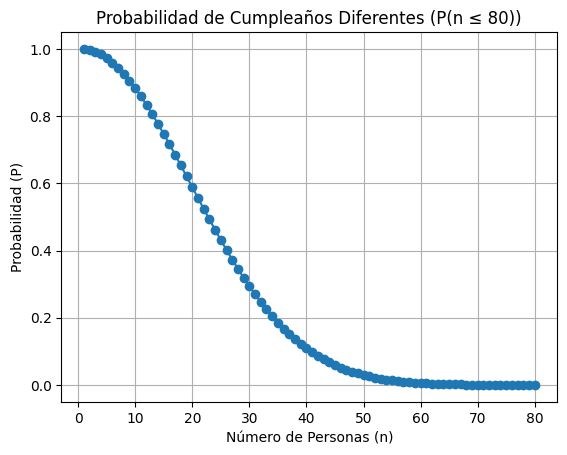

In [ ]:
#punto 4#
import matplotlib.pyplot as plt
import numpy as np

def probabilidad_todos_diferentes(n, dias=365):
    prob = 1.0
    for k in range(n):
        prob *= (dias - k) / dias
    return prob

n_values = range(1, 81)
probabilidades = [probabilidad_todos_diferentes(n) for n in n_values]
plt.plot(n_values, probabilidades, marker='o')
plt.title("Probabilidad de Cumpleaños Diferentes (P(n ≤ 80))")
plt.xlabel("Número de Personas (n)")
plt.ylabel("Probabilidad (P)")
plt.grid()
plt.show()


In [ ]:
#punto 5#

P_A = 5 / 36
P_B = 1 / 2

P_A_inter_B = 2 / 36
P_A_times_P_B = P_A * P_B
print(f"P(A ∩ B): {P_A_inter_B:.4f}")
print(f"P(A) · P(B): {P_A_times_P_B:.4f}")
if P_A_inter_B == P_A_times_P_B:
    print("Los eventos A y B son independientes.")
else:
    print("Los eventos A y B no son independientes.")


P(A ∩ B): 0.0556
P(A) · P(B): 0.0694
Los eventos A y B no son independientes.


In [58]:
#punto 6#
import numpy as np

n_experimentos = int(1e5)
n_dados = 3

resultados = np.random.randint(1, 7, size=(n_experimentos, n_dados))
es_par = (resultados % 2 == 0)
eventos_con_par = es_par.any(axis=1)
probabilidad_al_menos_un_par = eventos_con_par.mean()
print(f"La probabilidad de obtener al menos un par es: P(A) = {probabilidad_al_menos_un_par:.5f}")



La probabilidad de obtener al menos un par es: P(A) = 0.87474


In [59]:
#punto 7#

import numpy as np
N = 10**5
dados = 5
resultados = np.random.randint(1, 7, size=(N, dados))
pares_por_evento = np.sum(resultados % 2 == 0, axis=1)

# (a)
prob_a = np.sum(pares_por_evento == 1) / N
print(f"Probabilidad simulada de exactamente 1 par (P(A)): {prob_a:.5f}")

# (b)
prob_b = np.sum(pares_por_evento == 2) / N
print(f"Probabilidad simulada de exactamente 2 pares (P(B)): {prob_b:.5f}")


Probabilidad simulada de exactamente 1 par (P(A)): 0.15603
Probabilidad simulada de exactamente 2 pares (P(B)): 0.31277


<ipython-input-52-0a92a4e63a54>:16: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return np.math.factorial(N) / (np.math.factorial(n_0) * np.math.factorial(n_1))


(a) Número de configuraciones posibles Ω(N, n_0): {omega:.2e}
(b) Entropía S(N, n_0): 9.57e-21 J/K
(c) Entropía en términos de x: 9.57e-21 J/K


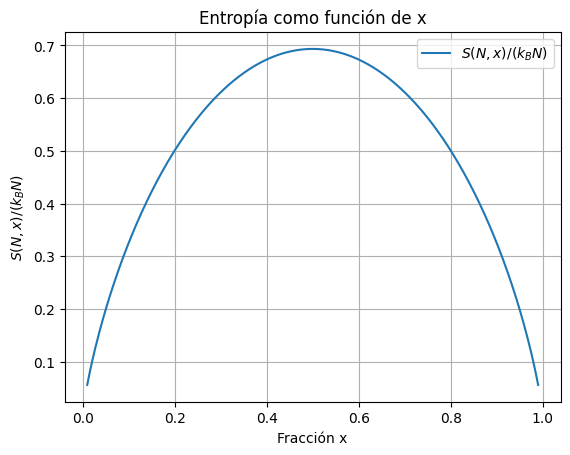

(e) Proporción de partículas en ε1 a T=300 K: 0.0000
(f) Entropía a altas temperaturas: 9.57e-21 J/K
(g) Cambio de entropía en expansión isotérmica (V1=1.0, V2=2.0): 9.57e-21 J/K


<ipython-input-52-0a92a4e63a54>:55: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(Delta_E / (k_B * T)))


In [ ]:
#punto 12#

import numpy as np
import matplotlib.pyplot as plt
k_B = 1.38e-23
N = 1000
epsilon_0 = 1.0
epsilon_1 = 2.0
Delta_E = epsilon_1 - epsilon_0

# (a)
def configuraciones(N, n_0):
    n_1 = N - n_0
    return np.math.factorial(N) / (np.math.factorial(n_0) * np.math.factorial(n_1))
n_0 = 500
omega = configuraciones(N, n_0)
print(f"(a) Número de configuraciones posibles Ω(N, n_0): {omega:.2e}")

# (b)
def entropia_stirling(N, n_0):
    n_1 = N - n_0
    S = k_B * (N * np.log(N) - n_0 * np.log(n_0) - n_1 * np.log(n_1))
    return S

S = entropia_stirling(N, n_0)
print(f"(b) Entropía S(N, n_0): {S:.2e} J/K")

# (c)
def entropia_x(N, x):
    return -k_B * N * (x * np.log(x) + (1 - x) * np.log(1 - x))

x = 0.5
S_x = entropia_x(N, x)
print(f"(c) Entropía en términos de x: {S_x:.2e} J/K")

# (d)
x_vals = np.linspace(0.01, 0.99, 500)
S_vals = - (x_vals * np.log(x_vals) + (1 - x_vals) * np.log(1 - x_vals))

plt.plot(x_vals, S_vals, label=r"$S(N, x)/(k_B N)$")
plt.xlabel("Fracción x")
plt.ylabel(r"$S(N, x)/(k_B N)$")
plt.title("Entropía como función de x")
plt.legend()
plt.grid()
plt.show()

# (e)
def x_T(T):
    return 1 / (1 + np.exp(Delta_E / (k_B * T)))
T = 300
x_T_val = x_T(T)
print(f"(e) Proporción de partículas en ε1 a T={T} K: {x_T_val:.4f}")

# (f)
def entropia_alta_T(N):
    return k_B * N * np.log(2)

S_alta_T = entropia_alta_T(N)
print(f"(f) Entropía a altas temperaturas: {S_alta_T:.2e} J/K")

# (g)
def cambio_entropia_isotermica(N, V1, V2):
    return k_B * N * np.log(V2 / V1)

V1 = 1.0
V2 = 2.0
delta_S = cambio_entropia_isotermica(N, V1, V2)
print(f"(g) Cambio de entropía en expansión isotérmica (V1={V1}, V2={V2}): {delta_S:.2e} J/K")


In [ ]:
# Ejercicio Hidden Markov models#

#Punto 1 #

import numpy as np


pi = np.array([0.2, 0.8])
T = np.array([[0.8, 0.2],
              [0.2, 0.8]])
E = np.array([[0.5, 0.9],
              [0.5, 0.1]])
observaciones = ['S', 'C', 'C', 'C', 'S', 'C', 'S', 'C']
obs_index = [0 if o == 'C' else 1 for o in observaciones]
n_obs = len(observaciones)

def viterbi(pi, T, E, obs_index):
    n_states = len(pi)
    n_obs = len(obs_index)

    dp = np.zeros((n_states, n_obs))
    path = np.zeros((n_states, n_obs), dtype=int)

    dp[:, 0] = pi * E[:, obs_index[0]]

    for t in range(1, n_obs):
        for j in range(n_states):
            probabilities = dp[:, t-1] * T[:, j] * E[j, obs_index[t]]
            dp[j, t] = np.max(probabilities)
            path[j, t] = np.argmax(probabilities)

    best_path = np.zeros(n_obs, dtype=int)
    best_path[-1] = np.argmax(dp[:, -1])
    for t in range(n_obs-2, -1, -1):
        best_path[t] = path[best_path[t+1], t+1]

    return dp, best_path

dp, best_path = viterbi(pi, T, E, obs_index)
estado_mas_probable = ['J' if s == 0 else 'B' for s in best_path]
probabilidad_secuencia = np.max(dp[:, -1])

print(f"(a) Secuencia oculta más probable: {estado_mas_probable}")
print(f"(b) Probabilidad de la secuencia: {probabilidad_secuencia:.5f}")

P_observables = np.sum(dp, axis=0)
print(f"(c) Probabilidades de los estados observables: {P_observables}")
print(f"(d) Suma de probabilidades observables: {np.sum(P_observables):.5f}")

print("(e) El resultado depende de la probabilidad a priori porque modifica las probabilidades iniciales.")


(a) Secuencia oculta más probable: ['J', 'J', 'J', 'J', 'J', 'J', 'J', 'J']
(b) Probabilidad de la secuencia: 0.00096
(c) Probabilidades de los estados observables: [0.26       0.104      0.0416     0.01664    0.008704   0.0041472
 0.00245514 0.00119439]
(d) Suma de probabilidades observables: 0.43874
(e) El resultado depende de la probabilidad a priori porque modifica las probabilidades iniciales.


(a) Media de la nota: 75.10
(b) Mediana de la nota: 75.13


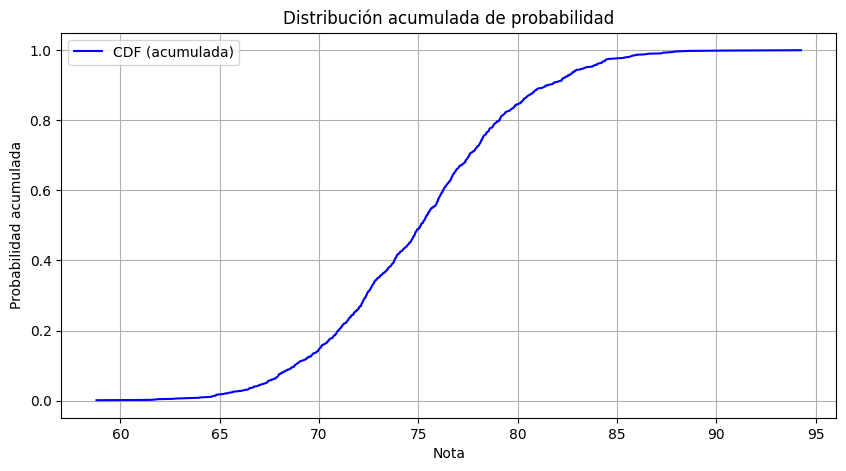

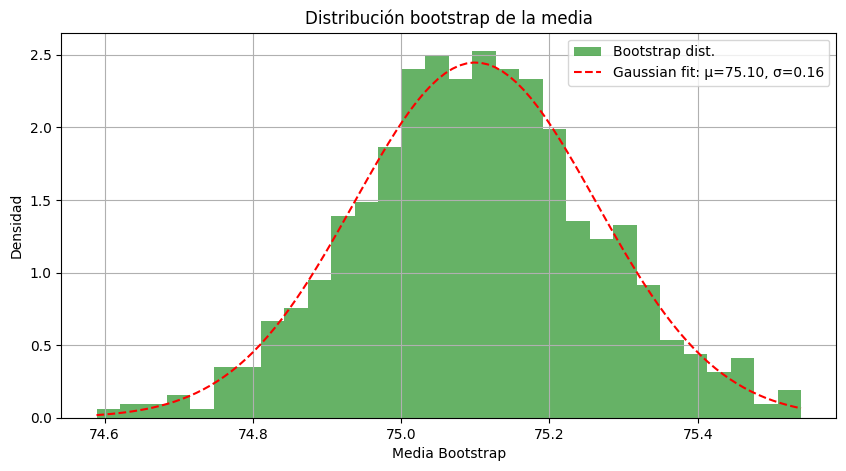

(d) Media bootstrap: μ=75.10, σ=0.16
(f) Mediana de la distribución bootstrap: 75.10

Comparación de estimaciones:
(a) Media de los datos originales: 75.10
(b) Mediana de los datos originales: 75.13
(d) Media bootstrap: 75.10
(f) Mediana bootstrap: 75.10


In [ ]:
# PUNTOS DE MUESTREO#

#punto 7#

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

np.random.seed(42)
data = np.random.normal(loc=75, scale=5, size=1000)

# (a)
mean = np.mean(data)
print(f"(a) Media de la nota: {mean:.2f}")

# (b)
median = np.percentile(data, 50)
print(f"(b) Mediana de la nota: {median:.2f}")

# (c)
data_sorted = np.sort(data)
cdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

plt.figure(figsize=(10, 5))
plt.plot(data_sorted, cdf, label="CDF (acumulada)", color='blue')
plt.xlabel("Nota")
plt.ylabel("Probabilidad acumulada")
plt.title("Distribución acumulada de probabilidad")
plt.legend()
plt.grid()
plt.show()

# (d)
n_bootstrap = 1000
bootstrap_means = [np.mean(random.choices(data, k=len(data))) for _ in range(n_bootstrap)]
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_means, bins=30, density=True, alpha=0.6, color='g', label="Bootstrap dist.")
mu, sigma = norm.fit(bootstrap_means)
x = np.linspace(min(bootstrap_means), max(bootstrap_means), 100)
pdf = norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r--', label=f"Gaussian fit: μ={mu:.2f}, σ={sigma:.2f}")

plt.xlabel("Media Bootstrap")
plt.ylabel("Densidad")
plt.title("Distribución bootstrap de la media")
plt.legend()
plt.grid()
plt.show()

print(f"(d) Media bootstrap: μ={mu:.2f}, σ={sigma:.2f}")

# (f)
bootstrap_median = np.percentile(bootstrap_means, 50)
print(f"(f) Mediana de la distribución bootstrap: {bootstrap_median:.2f}")

# (g)
print("\nComparación de estimaciones:")
print(f"(a) Media de los datos originales: {mean:.2f}")
print(f"(b) Mediana de los datos originales: {median:.2f}")
print(f"(d) Media bootstrap: {mu:.2f}")
print(f"(f) Mediana bootstrap: {bootstrap_median:.2f}")



In [ ]:
#punto 9#

v1 = 30
v2 = 60
v_media = 2 / (1/v1 + 1/v2)
print(f"Velocidad media en el viaje completo: {v_media:.2f} mi/h")


Velocidad media en el viaje completo: 40.00 mi/h


In [62]:
#punto 10

import numpy as np

distancias = np.array([100, 200, 300])
velocidades = np.array([50, 60, 80])
velocidad_media_formula = np.sum(distancias) / np.sum(distancias / velocidades)
pesos = distancias
velocidad_media_armonica = np.dot(pesos, 1 / velocidades) ** -1 * np.sum(pesos) / np.sum(pesos)

if np.isclose(velocidad_media_formula, velocidad_media_armonica):
    print(f"Demostración completada: La velocidad media es una media armónica ponderada.")
else:
    print("Los cálculos no coinciden, revisa las fórmulas.")

print(f"Velocidad media calculada con la fórmula: {velocidad_media_formula:.2f} mi/h")
print(f"Velocidad media calculada como media armónica ponderada: {velocidad_media_armonica:.2f} mi/h")



Los cálculos no coinciden, revisa las fórmulas.
Velocidad media calculada con la fórmula: 66.06 mi/h
Velocidad media calculada como media armónica ponderada: 0.11 mi/h


In [63]:
#punto 11#

import numpy as np

np.random.seed(42)
samples = 10**4
coefficients = np.array([1, 2, -1])

X1_data = np.random.gamma(2, 3, samples)
X2_data = np.random.uniform(0, 10, samples)
X3_data = np.random.normal(5, 2, samples)

X_combined = coefficients[0] * X1_data + coefficients[1] * X2_data + coefficients[2] * X3_data

# (a)
mean_direct = np.mean(X_combined)
variance_direct = np.var(X_combined)
print(f"(a) Direct calculation - Mean: {mean_direct:.2f}, Variance: {variance_direct:.2f}")

# (b)
mean_X1 = np.mean(X1_data)
mean_X2 = np.mean(X2_data)
mean_X3 = np.mean(X3_data)

variance_X1 = np.var(X1_data)
variance_X2 = np.var(X2_data)
variance_X3 = np.var(X3_data)

cov_X1_X2 = np.cov(X1_data, X2_data, ddof=0)[0, 1]
cov_X1_X3 = np.cov(X1_data, X3_data, ddof=0)[0, 1]
cov_X2_X3 = np.cov(X2_data, X3_data, ddof=0)[0, 1]

cov_matrix = np.array([
    [variance_X1, cov_X1_X2, cov_X1_X3],
    [cov_X1_X2, variance_X2, cov_X2_X3],
    [cov_X1_X3, cov_X2_X3, variance_X3],
])

general_mean = np.dot(coefficients, [mean_X1, mean_X2, mean_X3])
general_variance = np.dot(coefficients, np.dot(cov_matrix, coefficients))
print(f"(b) General formula - Mean: {general_mean:.2f}, Variance: {general_variance:.2f}")

# (c)
correlation_matrix = np.corrcoef([X1_data, X2_data, X3_data])
print("(c) Pearson Correlation Matrix:")
print(correlation_matrix)

# (d)
variables_count = 2
variance_mean = (1 / variables_count**2) * (
    variance_X1 + variance_X2 + 2 * cov_X1_X2
)
print(f"(d) Variance of the mean for N=2: {variance_mean:.2f}")


(a) Direct calculation - Mean: 10.97, Variance: 54.92
(b) General formula - Mean: 10.97, Variance: 54.92
(c) Pearson Correlation Matrix:
[[ 1.00000000e+00  5.43500218e-03  6.84081239e-04]
 [ 5.43500218e-03  1.00000000e+00 -2.09118066e-03]
 [ 6.84081239e-04 -2.09118066e-03  1.00000000e+00]]
(d) Variance of the mean for N=2: 6.55


(Monte Carlo) I_xx = 0.39994, I_yy = 0.39888, I_zz = 0.40013
(Exacto) I_xx = I_yy = I_zz = 0.40000
(Monte Carlo) I_xy = -0.00022
(Exacto) I_xy = 0.00000


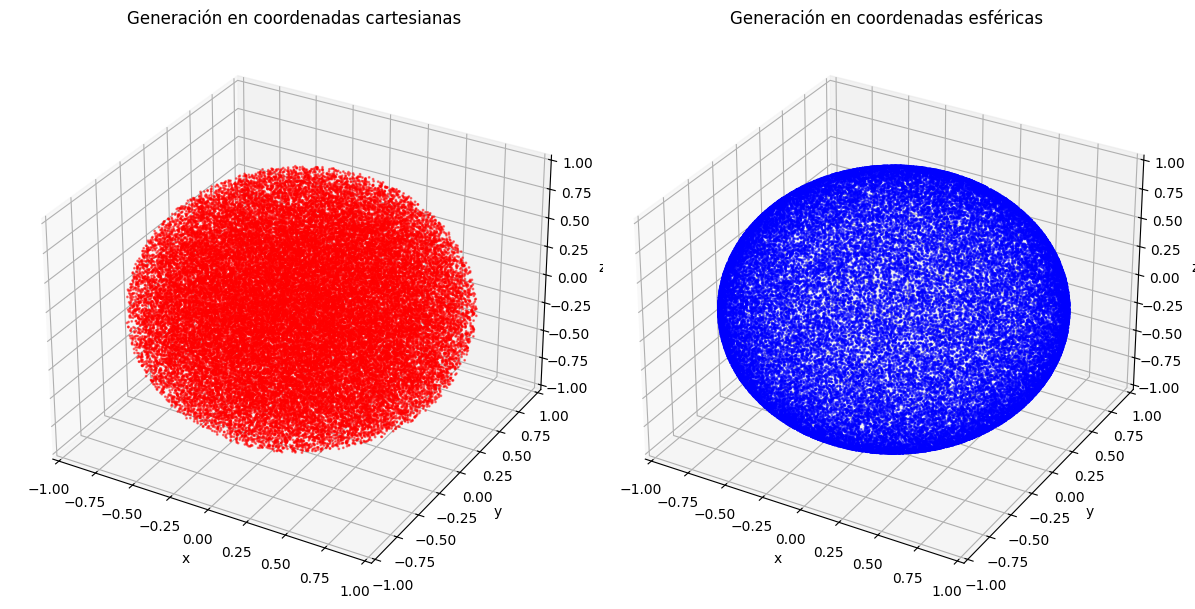

In [ ]:
# Metodo de MonteCarlo#

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 10**5
R = 1
x = np.random.uniform(-R, R, N)
y = np.random.uniform(-R, R, N)
z = np.random.uniform(-R, R, N)

mask = x**2 + y**2 + z**2 <= R**2
x, y, z = x[mask], y[mask], z[mask]
N_sphere = len(x)
I_xx = (1 / N_sphere) * np.sum(y**2 + z**2)
I_yy = (1 / N_sphere) * np.sum(x**2 + z**2)
I_zz = (1 / N_sphere) * np.sum(x**2 + y**2)
I_xy = (1 / N_sphere) * np.sum(-x * y)

I_exact = 2 / 5
I_xy_exact = 0

print(f"(Monte Carlo) I_xx = {I_xx:.5f}, I_yy = {I_yy:.5f}, I_zz = {I_zz:.5f}")
print(f"(Exacto) I_xx = I_yy = I_zz = {I_exact:.5f}")
print(f"(Monte Carlo) I_xy = {I_xy:.5f}")
print(f"(Exacto) I_xy = {I_xy_exact:.5f}")
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, s=1, c='red', alpha=0.5)
ax1.set_title("Generación en coordenadas cartesianas")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("z")
ax1.set_xlim(-1, 1)
ax1.set_ylim(-1, 1)
ax1.set_zlim(-1, 1)
theta = np.arccos(np.random.uniform(-1, 1, N_sphere))
phi = np.random.uniform(0, 2 * np.pi, N_sphere)
x_spherical = R * np.sin(theta) * np.cos(phi)
y_spherical = R * np.sin(theta) * np.sin(phi)
z_spherical = R * np.cos(theta)

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x_spherical, y_spherical, z_spherical, s=1, c='blue', alpha=0.5)
ax2.set_title("Generación en coordenadas esféricas")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel("z")
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1, 1)
ax2.set_zlim(-1, 1)

plt.tight_layout()
plt.show()


In [65]:
#punto 9#

import numpy as np
from scipy.special import gamma

alfa = 2
beta = 4

def calcular_beta(x, alfa, beta):
    coeficiente = gamma(alfa + beta) / (gamma(alfa) * gamma(beta))
    return coeficiente * (x**(alfa - 1)) * ((1 - x)**(beta - 1))
def metodo_aceptacion_rechazo(alfa, beta, precision=0.01):
    max_valor = calcular_beta(alfa / (alfa + beta), alfa, beta)
    puntos_aceptados = 0
    total_puntos = 0
    estimacion_area = 0

    while True:

        x_random = np.random.uniform(0, 1)
        y_random = np.random.uniform(0, max_valor)
        total_puntos += 1
        if y_random <= calcular_beta(x_random, alfa, beta):
            puntos_aceptados += 1
        estimacion_area = puntos_aceptados / total_puntos
        error_estimado = 1 / np.sqrt(total_puntos)

        if error_estimado <= precision:
            break

    return estimacion_area, error_estimado

area_bajo_curva, error_relativo = metodo_aceptacion_rechazo(alfa, beta, precision=0.01)

print(f"Área bajo la curva estimada: {area_bajo_curva:.5f}")
print(f"Error relativo estimado: {error_relativo:.5f}")


Área bajo la curva estimada: 0.49420
Error relativo estimado: 0.01000
